# Neural Networks
In this notebook we will practice using the Keras library to access Google Tensorflow functionality.  This library will allow us to train and test a neural network and we will practice how to size and shape the network.  

You will need to install the tensorflow library using 
***pip install tensorflow*** in your Anaconda command window.  Make sure you use ***pip*** and not ***conda*** as the official instructions say that tensorflow is not ready to be used with conda for installation (https://www.tensorflow.org/install/pip).  
Steps:
* load the Anaconda command prompt with Administrative Rights
* type **pip install tensorflow** and hit enter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

np.random.seed(1)

### Data loading and preparation

In [2]:
# Read in the DPA datasest from Module 1
X = pd.read_csv("DPA_Data_Small.csv").values
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()

Remember that the DPA dataset has Radio Frequency (RF) data as observations, where each variable is the power reading at a particular time sample.  The target is one of 8 Hamming Weights, which indicate how many bits are high in the memory unit of the chip for that observation.  

Let's simplify this problem by looking at only 2 classes

In [3]:
class1 = 2
class2 = 6

In [4]:
X_2class = X[((y==class1) | (y==class2)),:]
y_2class = y[(y==class1) | (y==class2)]
X_2class.shape

(224, 59)

In [5]:
# Need to convert classes to 0 and 1
y_2class[y_2class==class1]=0
y_2class[y_2class==class2]=1

In [6]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2class, y_2class, test_size=0.3, random_state=1)

We need to scale the data for the neural network training.   It's important to learn the scaling parameters with just the training set so that you can apply those to the test set.  Because in reality you will only have the training set beforehand and you would normally just learn the scaling parameters with the training set and apply it to the test set.   

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

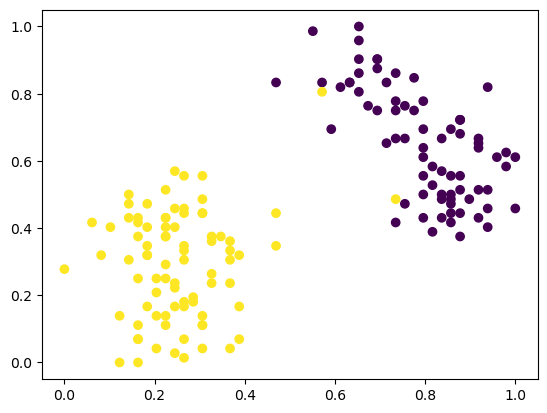

In [8]:
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
plt.show()

### Training the model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
#help(Sequential)

This is the NN we are trying to build: 
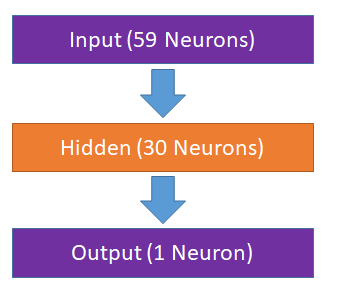

In [11]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dense(30,activation="relu"))

model.add(Dense(1,activation='sigmoid'))  

We will be using the **Adam** optimizer which is the adaptive gradient descent algorithm, which usually converges quicker with better results than others.  

While MSE is more useful for an estimation type problem, here we have a binary classification problem.  For the loss function for this problem, we will be using the **binary_crossentropy** loss function.  To see more information on when to use which loss function, see this link: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [13]:
model.fit(x = X_train, y=y_train,epochs=100)
# later we can see how to find the number epochs better

Epoch 1/100
5/5 [==============================] - 2s 10ms/step - loss: 0.6209
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5510
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.4958
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4419
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3881
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3333
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2819
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.2339
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1911
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1539
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1242
Epoch 12/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1006
Epoch 13/100
5/5 [==============================] - 0s 7ms/s

Now let's plot the error throughout the epochs

<AxesSubplot:>

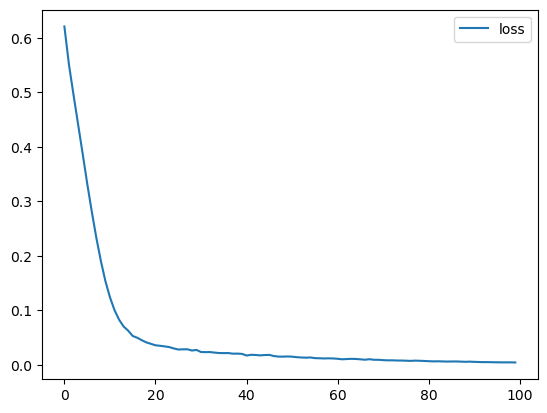

In [14]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Evaluate Model
Let's explore various ways to evaluate the model

In [15]:
# overall loss for test set
model.evaluate(x=X_test, y=y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0524


0.05239079147577286

In [16]:
# record all predictions
ypred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


***Curiosity Points (5 Points)*** Examine the code below to see the exact outputs of the NN for the predictions and compare them with the original class labels for the test set.  Then round the numbers and print the classification report.  

In [17]:
ypred[0:6]

array([[1.5568808e-03],
       [9.9993706e-01],
       [1.5322113e-03],
       [9.9995792e-01],
       [1.3546471e-04],
       [9.9992514e-01]], dtype=float32)

In [18]:
y_test[0:6]

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [19]:
ypred2 = np.round(ypred)

In [20]:
ypred2[0:6]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        41

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



### Saving and loading the model
This allows it to be exported and used in future notebooks if desired

In [22]:
# Save Model
model.save("FirstNN.H5")

INFO:tensorflow:Assets written to: FirstNN.H5\assets


INFO:tensorflow:Assets written to: FirstNN.H5\assets


In [23]:
# Example of loading Model (for practice)
from tensorflow.keras.models import load_model
model2 = load_model("FirstNN.H5")

## Fine Tuning your Neural Network
### Validation set
Use a validation set while you are running each epoch to see how the loss on separate data is doing as you train.  This can prevent overtraining.  

In [24]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test)) #training many more epochs for next section

Epoch 1/250
5/5 [==============================] - 3s 110ms/step - loss: 0.6384 - val_loss: 0.6026
Epoch 2/250
5/5 [==============================] - 0s 21ms/step - loss: 0.5421 - val_loss: 0.5053
Epoch 3/250
5/5 [==============================] - 0s 25ms/step - loss: 0.4545 - val_loss: 0.4314
Epoch 4/250
5/5 [==============================] - 0s 26ms/step - loss: 0.3880 - val_loss: 0.3711
Epoch 5/250
5/5 [==============================] - 0s 23ms/step - loss: 0.3277 - val_loss: 0.3129
Epoch 6/250
5/5 [==============================] - 0s 26ms/step - loss: 0.2730 - val_loss: 0.2556
Epoch 7/250
5/5 [==============================] - 0s 28ms/step - loss: 0.2209 - val_loss: 0.2068
Epoch 8/250
5/5 [==============================] - 0s 27ms/step - loss: 0.1752 - val_loss: 0.1626
Epoch 9/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1359 - val_loss: 0.1320
Epoch 10/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1095 - val_loss: 0.1111
Epoch 11/250
5/5 [

Epoch 84/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0082 - val_loss: 0.0404
Epoch 85/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0086 - val_loss: 0.0410
Epoch 86/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.0430
Epoch 87/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0081 - val_loss: 0.0443
Epoch 88/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0078 - val_loss: 0.0439
Epoch 89/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0429
Epoch 90/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0074 - val_loss: 0.0415
Epoch 91/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0072 - val_loss: 0.0397
Epoch 92/250
5/5 [==============================] - 0s 14ms/step - loss: 0.0073 - val_loss: 0.0426
Epoch 93/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0440
Epoch 94/2

5/5 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0542
Epoch 167/250
5/5 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.0522
Epoch 168/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.0507
Epoch 169/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 0.0503
Epoch 170/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0549
Epoch 171/250
5/5 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.0535
Epoch 172/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.0524
Epoch 173/250
5/5 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.0519
Epoch 174/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0550
Epoch 175/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0576
Epoch 176/250


5/5 [==============================] - 0s 12ms/step - loss: 6.7139e-04 - val_loss: 0.0606
Epoch 247/250
5/5 [==============================] - 0s 13ms/step - loss: 6.8166e-04 - val_loss: 0.0627
Epoch 248/250
5/5 [==============================] - 0s 13ms/step - loss: 6.5685e-04 - val_loss: 0.0615
Epoch 249/250
5/5 [==============================] - 0s 13ms/step - loss: 6.3960e-04 - val_loss: 0.0615
Epoch 250/250
5/5 [==============================] - 0s 16ms/step - loss: 6.6763e-04 - val_loss: 0.0629


(0.0, 0.1)

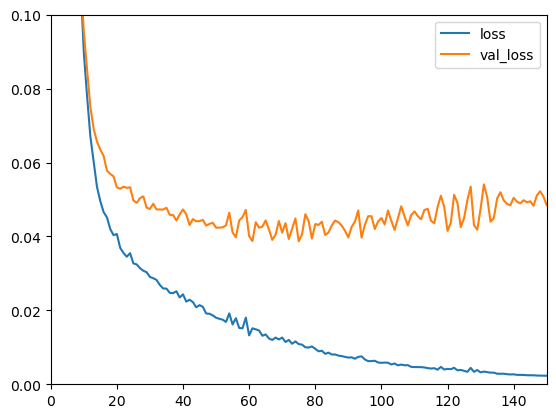

In [25]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlim([0,150])
plt.ylim([0,0.1])

It looks like the validation loss starts to stop decreasing around 10 epochs and starts to increase after 60 epochs (change the xlim and ylim settings to zoom in)

### Call-backs for Early Stopping
Monitor Valudation-Loss to stop after a certain condition.  

In [26]:
''' from tensorflow.keras.layers import Dropout
model2 = Sequential()

model2.add(Dense(59,activation="relu"))
model2.add(Dense(30,activation="relu"))
model2.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model2.compile(optimizer="Adam", loss="binary_crossentropy") '''

' from tensorflow.keras.layers import Dropout\nmodel2 = Sequential()\n\nmodel2.add(Dense(59,activation="relu"))\nmodel2.add(Dense(30,activation="relu"))\nmodel2.add(Dense(1,activation=\'sigmoid\'))  # Note that if you had more than 2 classes, then you could \n\nmodel2.compile(optimizer="Adam", loss="binary_crossentropy") '

In the function below:
* **monitor** is what you are ... monitoriing.  
 * In this case we are keeping an eye on the validation set loss 
* **mode** is when you want to start monitoring.  
 * In this case, we want the minimum validation loss
* **patience** is how many epochs to keep going after we notice that the val_loss has stopped going down
 * This accounts for noise between epochs

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [28]:
model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[earlyStop])

Epoch 1/250
5/5 [==============================] - 0s 30ms/step - loss: 6.3966e-04 - val_loss: 0.0609
Epoch 2/250
5/5 [==============================] - 0s 15ms/step - loss: 6.6067e-04 - val_loss: 0.0590
Epoch 3/250
5/5 [==============================] - 0s 15ms/step - loss: 6.2379e-04 - val_loss: 0.0605
Epoch 4/250
5/5 [==============================] - 0s 15ms/step - loss: 6.5313e-04 - val_loss: 0.0637
Epoch 5/250
5/5 [==============================] - 0s 15ms/step - loss: 6.1990e-04 - val_loss: 0.0623
Epoch 6/250
5/5 [==============================] - 0s 15ms/step - loss: 6.1613e-04 - val_loss: 0.0613
Epoch 7/250
5/5 [==============================] - 0s 14ms/step - loss: 5.9783e-04 - val_loss: 0.0614
Epoch 8/250
5/5 [==============================] - 0s 17ms/step - loss: 5.9959e-04 - val_loss: 0.0634
Epoch 9/250
5/5 [==============================] - 0s 18ms/step - loss: 5.8461e-04 - val_loss: 0.0631
Epoch 10/250
5/5 [==============================] - 0s 19ms/step - loss: 5.7568e-0

Early Stop will end differently for different runs due to randomness instructions behind the scenes in Keras.

### Drop Off Neurons
Some neurons can be "turned off" during training to prevent overfitting.  These neurons pass the input directly to the output, acting as a wire.  Below we will set a certain percentage of randomly chosen neurons to turn off at each epoch.  Generally between 30% and 50% is a good setting.  

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dropout(0.3)) # 30% of randomly chosen neurons in the layer are turned off in each epoch 

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="Adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[earlyStop]) #use in combination with early stopping

Epoch 1/250
5/5 [==============================] - 2s 57ms/step - loss: 0.7442 - val_loss: 0.6824
Epoch 2/250
5/5 [==============================] - 0s 15ms/step - loss: 0.6772 - val_loss: 0.6337
Epoch 3/250
5/5 [==============================] - 0s 15ms/step - loss: 0.6407 - val_loss: 0.5836
Epoch 4/250
5/5 [==============================] - 0s 16ms/step - loss: 0.6007 - val_loss: 0.5356
Epoch 5/250
5/5 [==============================] - 0s 20ms/step - loss: 0.5225 - val_loss: 0.4867
Epoch 6/250
5/5 [==============================] - 0s 21ms/step - loss: 0.4665 - val_loss: 0.4266
Epoch 7/250
5/5 [==============================] - 0s 23ms/step - loss: 0.4223 - val_loss: 0.3652
Epoch 8/250
5/5 [==============================] - 0s 18ms/step - loss: 0.3744 - val_loss: 0.3140
Epoch 9/250
5/5 [==============================] - 0s 16ms/step - loss: 0.3293 - val_loss: 0.2665
Epoch 10/250
5/5 [==============================] - 0s 16ms/step - loss: 0.3037 - val_loss: 0.2283
Epoch 11/250
5/5 [=

In [31]:
losses = pd.DataFrame(model.history.history)

Text(15, 0.4, 'Better: training and validation losses\n are closer together')

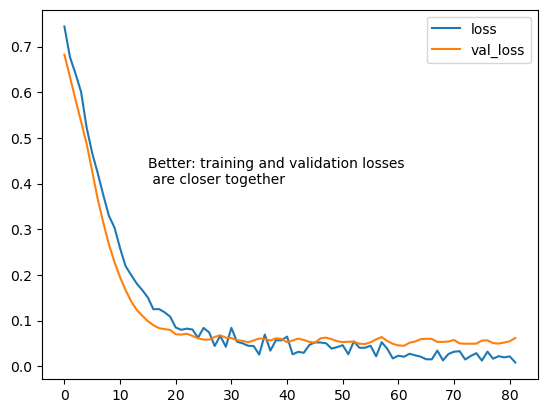

In [32]:
losses.plot()
plt.text(x=15,y=0.4,s="Better: training and validation losses\n are closer together")

Better here because training and validation loss is closer together

 ### Classification Metrics

In [33]:
ypred = model.predict(X_test)
ypred = ypred.round()

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        41

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [34]:
# Save Optimized Model
model.save("OptimizedNN.H5")

INFO:tensorflow:Assets written to: OptimizedNN.H5\assets


INFO:tensorflow:Assets written to: OptimizedNN.H5\assets
